In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
universe_df = pd.read_csv(r"C:\Users\WeeKe\Desktop\Stock_Universe.csv")
fama_df = pd.read_csv("Fama-French.csv")

In [5]:
universe_df

,gvkey,iid,datadate,tic,trt1m,naics,sic
0,1000,01,30/09/1970,AE.2,NaN,NaN,3089.0
1,1000,01,31/10/1970,AE.2,6.3830,NaN,3089.0
2,1000,01,30/11/1970,AE.2,-28.0000,NaN,3089.0
3,1000,01,31/12/1970,AE.2,11.1111,NaN,3089.0
4,1000,01,31/01/1971,AE.2,-10.0000,NaN,3089.0
...,...,...,...,...,...,...,...
7560347,352257,01C,30/06/2022,HX.,-14.2857,212393.0,1400.0
7560348,352257,01C,31/07/2022,HX.,-8.3333,212393.0,1400.0
7560349,352257,01C,31/08/2022,HX.,38.1818,212393.0,1400.0
7560350,353444,90,31/07/2022,HLN,NaN,325412.0,2834.0


In [6]:
universe_df.drop(columns = ["gvkey", "iid"])

,datadate,tic,trt1m,naics,sic
0,30/09/1970,AE.2,NaN,NaN,3089.0
1,31/10/1970,AE.2,6.3830,NaN,3089.0
2,30/11/1970,AE.2,-28.0000,NaN,3089.0
3,31/12/1970,AE.2,11.1111,NaN,3089.0
4,31/01/1971,AE.2,-10.0000,NaN,3089.0
...,...,...,...,...,...
7560347,30/06/2022,HX.,-14.2857,212393.0,1400.0
7560348,31/07/2022,HX.,-8.3333,212393.0,1400.0
7560349,31/08/2022,HX.,38.1818,212393.0,1400.0
7560350,31/07/2022,HLN,NaN,325412.0,2834.0


In [7]:
universe_df["tic"].unique()

array(['AE.2', 'AMFD.', 'AAIC.1', ..., 'HXLTF', 'HX.', 'HLN'],
      dtype=object)

In [8]:
len(universe_df["tic"].unique())

56123

In [9]:
fama_df

,dateff,mktrf,smb,hml,rf,umd
0,31/01/1962,-0.0387,0.0177,0.0513,0.0024,-0.0203
1,28/02/1962,0.0181,-0.0115,0.0082,0.0020,-0.0101
2,30/03/1962,-0.0068,0.0052,-0.0138,0.0020,0.0184
3,30/04/1962,-0.0659,-0.0070,0.0003,0.0022,0.0291
4,31/05/1962,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...,...
722,31/03/2022,0.0305,-0.0160,-0.0180,0.0001,0.0300
723,29/04/2022,-0.0946,-0.0141,0.0619,0.0001,0.0489
724,31/05/2022,-0.0034,-0.0185,0.0841,0.0003,0.0248
725,30/06/2022,-0.0843,0.0209,-0.0597,0.0006,0.0079


# Cleaning Fama

In [10]:
fama_df

,dateff,mktrf,smb,hml,rf,umd
0,31/01/1962,-0.0387,0.0177,0.0513,0.0024,-0.0203
1,28/02/1962,0.0181,-0.0115,0.0082,0.0020,-0.0101
2,30/03/1962,-0.0068,0.0052,-0.0138,0.0020,0.0184
3,30/04/1962,-0.0659,-0.0070,0.0003,0.0022,0.0291
4,31/05/1962,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...,...
722,31/03/2022,0.0305,-0.0160,-0.0180,0.0001,0.0300
723,29/04/2022,-0.0946,-0.0141,0.0619,0.0001,0.0489
724,31/05/2022,-0.0034,-0.0185,0.0841,0.0003,0.0248
725,30/06/2022,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [11]:
fama_df["dateff"] = pd.to_datetime(fama_df["dateff"])
fama_df

,dateff,mktrf,smb,hml,rf,umd
0,1962-01-31,-0.0387,0.0177,0.0513,0.0024,-0.0203
1,1962-02-28,0.0181,-0.0115,0.0082,0.0020,-0.0101
2,1962-03-30,-0.0068,0.0052,-0.0138,0.0020,0.0184
3,1962-04-30,-0.0659,-0.0070,0.0003,0.0022,0.0291
4,1962-05-31,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...,...
722,2022-03-31,0.0305,-0.0160,-0.0180,0.0001,0.0300
723,2022-04-29,-0.0946,-0.0141,0.0619,0.0001,0.0489
724,2022-05-31,-0.0034,-0.0185,0.0841,0.0003,0.0248
725,2022-06-30,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [12]:
fama_df.set_index("dateff", inplace=True)

# Filtering Universe of Stocks

## Sin Stocks

In [13]:
sic_beverages = [2080, 2082, 2083, 2084, 2085] 
sic_smoke = [x for x in range(2100, 2200)]

naics_sin = [7132, 713210, 71329, 713290, 72112, 721120]
sic_sin = sic_beverages + sic_smoke

In [14]:
len(universe_df[universe_df["sic"].isin(sic_sin)].tic.unique())

198

In [15]:
len(universe_df[universe_df["naics"].isin(naics_sin)].tic.unique())

154

In [16]:
sin_stocks = universe_df[((universe_df["sic"].isin(sic_sin)) | (universe_df["naics"].isin(naics_sin)))]

In [17]:
sin_stocks

,gvkey,iid,datadate,tic,trt1m,naics,sic
65809,1320,01,30/09/1972,ALV.3,NaN,NaN,2080.0
65810,1320,01,31/10/1972,ALV.3,9.0498,NaN,2080.0
65811,1320,01,30/11/1972,ALV.3,-3.7344,NaN,2080.0
65812,1320,01,31/12/1972,ALV.3,7.3276,NaN,2080.0
65813,1320,01,31/01/1973,ALV.3,18.0723,NaN,2080.0
...,...,...,...,...,...,...,...
7560199,350910,01C,30/04/2022,RVLY.,-6.7073,713290.0,7990.0
7560200,350910,01C,31/05/2022,RVLY.,-5.8824,713290.0,7990.0
7560201,350910,01C,30/06/2022,RVLY.,-38.1944,713290.0,7990.0
7560202,350910,01C,31/07/2022,RVLY.,-3.3708,713290.0,7990.0


In [18]:
len(sin_stocks["tic"].unique())

352

In [19]:
# Changing to datetime format
sin_stocks["datadate"] = pd.to_datetime(sin_stocks["datadate"])
sin_stocks.head()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic
65809,1320,01,1972-09-30,ALV.3,NaN,NaN,2080.0
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0


In [20]:
# Transforming returns to decimal values
sin_stocks["monthly_decimal_returns"] = sin_stocks["trt1m"] / 100
sin_stocks

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns
65809,1320,01,1972-09-30,ALV.3,NaN,NaN,2080.0,NaN
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0,0.090498
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0,-0.037344
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0,0.073276
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0,0.180723
...,...,...,...,...,...,...,...,...
7560199,350910,01C,2022-04-30,RVLY.,-6.7073,713290.0,7990.0,-0.067073
7560200,350910,01C,2022-05-31,RVLY.,-5.8824,713290.0,7990.0,-0.058824
7560201,350910,01C,2022-06-30,RVLY.,-38.1944,713290.0,7990.0,-0.381944
7560202,350910,01C,2022-07-31,RVLY.,-3.3708,713290.0,7990.0,-0.033708


In [21]:
sin_pivot = sin_stocks.pivot(index = "datadate", columns = "tic", values = "monthly_decimal_returns")
sin_pivot

tic,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.268707,-0.056090,NaN,NaN,NaN,NaN,NaN,-0.328664,-0.065172,-0.062145
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.279070,-0.016787,NaN,NaN,NaN,NaN,NaN,0.006421,0.163412,-0.137973
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.167548,0.129366,NaN,NaN,NaN,NaN,NaN,0.012759,-0.032244,0.114075


In [22]:
from pandas.tseries.offsets import MonthEnd
sin_pivot.index = sin_pivot.index + MonthEnd(0)
sin_pivot

tic,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.268707,-0.056090,NaN,NaN,NaN,NaN,NaN,-0.328664,-0.065172,-0.062145
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.279070,-0.016787,NaN,NaN,NaN,NaN,NaN,0.006421,0.163412,-0.137973
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.167548,0.129366,NaN,NaN,NaN,NaN,NaN,0.012759,-0.032244,0.114075


# Sin Portfolio

## Finding active stocks in each month

In [23]:
sin_portfolio = sin_pivot.copy()
sin_portfolio["Num_Active_Stocks"] = len(sin_stocks["tic"].unique()) - sin_portfolio.isnull().sum(axis = 1)
sin_portfolio["Portfolio_Proportion"] = 1/sin_portfolio["Num_Active_Stocks"]

sin_portfolio

tic,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN,Num_Active_Stocks,Portfolio_Proportion
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,inf
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.100000
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.328664,-0.065172,-0.062145,107,0.009346
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.006421,0.163412,-0.137973,107,0.009346
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.012759,-0.032244,0.114075,108,0.009259


## Multiplying each row by its respective portfolio proportions

In [24]:
portfolio_returns = sin_portfolio.mul(sin_portfolio["Portfolio_Proportion"], axis = 0)
portfolio_returns.drop(columns = ["Num_Active_Stocks", "Portfolio_Proportion"], inplace = True)
portfolio_returns

tic,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002511,-0.000524,NaN,NaN,NaN,NaN,NaN,-0.003072,-0.000609,-0.000581
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002608,-0.000157,NaN,NaN,NaN,NaN,NaN,0.000060,0.001527,-0.001289
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001551,0.001198,NaN,NaN,NaN,NaN,NaN,0.000118,-0.000299,0.001056


In [25]:
portfolio_returns["Portfolio_Returns"] = portfolio_returns.sum(axis = 1)
portfolio_returns["Portfolio_Proportion"] = sin_portfolio["Portfolio_Proportion"]
sin_portfolio_merged = pd.concat([sin_portfolio[["Num_Active_Stocks"]], portfolio_returns], axis = 1, join = "inner")

sin_portfolio_merged

tic,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,...,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN,Portfolio_Returns,Portfolio_Proportion
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,inf
1962-02-28,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016444,0.100000
1962-03-31,13,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011945,0.076923
1962-04-30,13,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073594,0.076923
1962-05-31,13,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.138066,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.003072,-0.000609,-0.000581,-0.032238,0.009346
2022-06-30,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000060,0.001527,-0.001289,121.435758,0.009346
2022-07-31,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000118,-0.000299,0.001056,2.030022,0.009259


In [26]:
moved_cols = ["Portfolio_Returns", "Portfolio_Proportion"]

sin_portfolio_merged = sin_portfolio_merged[moved_cols + [col for col in sin_portfolio_merged.columns if col not in moved_cols]]
sin_portfolio_merged.head()

tic,Portfolio_Returns,Portfolio_Proportion,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,0.000000,inf,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-02-28,0.016444,0.100000,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.011945,0.076923,13,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.073594,0.076923,13,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.138066,0.076923,13,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
sin_portfolio_merged.describe()["Portfolio_Returns"]

count      729.000000
mean        19.059838
std        504.510007
min         -0.257608
25%         -0.008865
50%          0.024869
75%          0.075842
max      13621.558547
Name: Portfolio_Returns, dtype: float64

## Removing periods where there are no returns

In [28]:
sin_portfolio_merged[sin_portfolio_merged["Portfolio_Returns"] == 0]

tic,Portfolio_Returns,Portfolio_Proportion,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-01-31,0.0,inf,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30,0.0,inf,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
sin_portfolio_merged = sin_portfolio_merged.loc[~(sin_portfolio_merged["Portfolio_Returns"] == 0)]
sin_portfolio_merged

tic,Portfolio_Returns,Portfolio_Proportion,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,0.016444,0.100000,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.011945,0.076923,13,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.073594,0.076923,13,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.138066,0.076923,13,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,-0.052827,0.076923,13,-0.005007,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,0.833315,0.009091,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000660,-0.000645,NaN,NaN,NaN,NaN,NaN,0.000231,-0.001346,-0.001056
2022-05-31,-0.032238,0.009346,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002511,-0.000524,NaN,NaN,NaN,NaN,NaN,-0.003072,-0.000609,-0.000581
2022-06-30,121.435758,0.009346,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002608,-0.000157,NaN,NaN,NaN,NaN,NaN,0.000060,0.001527,-0.001289


In [30]:
sin_portfolio_merged.loc["2022-01-31"]

tic
Portfolio_Returns       13621.558547
Portfolio_Proportion        0.008621
Num_Active_Stocks         116.000000
2788A                            NaN
3157B                            NaN
                            ...     
WIMHY                            NaN
WNWN                             NaN
WVVI                        0.000100
WYNMY                       0.000878
WYNN                        0.000042
Name: 2022-01-31 00:00:00, Length: 355, dtype: float64

# Sin Regression

In [31]:
sin_returns = sin_portfolio_merged[["Portfolio_Returns"]]
sin_returns

tic,Portfolio_Returns
datadate,
1962-02-28,0.016444
1962-03-31,-0.011945
1962-04-30,-0.073594
1962-05-31,-0.138066
1962-06-30,-0.052827
...,...
2022-04-30,0.833315
2022-05-31,-0.032238
2022-06-30,121.435758


In [32]:
fama_df.index = fama_df.index + MonthEnd(0)
fama_df

,mktrf,smb,hml,rf,umd
dateff,,,,,
1962-01-31,-0.0387,0.0177,0.0513,0.0024,-0.0203
1962-02-28,0.0181,-0.0115,0.0082,0.0020,-0.0101
1962-03-31,-0.0068,0.0052,-0.0138,0.0020,0.0184
1962-04-30,-0.0659,-0.0070,0.0003,0.0022,0.0291
1962-05-31,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...
2022-03-31,0.0305,-0.0160,-0.0180,0.0001,0.0300
2022-04-30,-0.0946,-0.0141,0.0619,0.0001,0.0489
2022-05-31,-0.0034,-0.0185,0.0841,0.0003,0.0248


In [33]:
sin_model_df = pd.concat([sin_returns, fama_df], axis = 1, join = "inner")
sin_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646
...,...,...,...,...,...,...
2022-03-31,0.053648,0.0305,-0.0160,-0.0180,0.0001,0.0300
2022-04-30,0.833315,-0.0946,-0.0141,0.0619,0.0001,0.0489
2022-05-31,-0.032238,-0.0034,-0.0185,0.0841,0.0003,0.0248
2022-06-30,121.435758,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [34]:
sin_model_df["Portfolio_Excess_Returns"] = sin_model_df["Portfolio_Returns"] - sin_model_df["rf"]
sin_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd,Portfolio_Excess_Returns
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827
...,...,...,...,...,...,...,...
2022-03-31,0.053648,0.0305,-0.0160,-0.0180,0.0001,0.0300,0.053548
2022-04-30,0.833315,-0.0946,-0.0141,0.0619,0.0001,0.0489,0.833215
2022-05-31,-0.032238,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.032538
2022-06-30,121.435758,-0.0843,0.0209,-0.0597,0.0006,0.0079,121.435158


In [35]:
sin_model_df.rename(columns = {"mktrf": "ExRm", "smb": "SMB", "hml": "HML", "umd": "MOM"}, inplace=True)

In [36]:
sin_model_df

,Portfolio_Returns,ExRm,SMB,HML,rf,MOM,Portfolio_Excess_Returns
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827
...,...,...,...,...,...,...,...
2022-03-31,0.053648,0.0305,-0.0160,-0.0180,0.0001,0.0300,0.053548
2022-04-30,0.833315,-0.0946,-0.0141,0.0619,0.0001,0.0489,0.833215
2022-05-31,-0.032238,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.032538
2022-06-30,121.435758,-0.0843,0.0209,-0.0597,0.0006,0.0079,121.435158


# Including Recession Indicator

In [37]:
recession = pd.read_csv("USREC.csv")

In [38]:
recession["DATE"] = pd.to_datetime(recession["DATE"])
recession["DATE"] = recession["DATE"] + MonthEnd(0)
recession

,DATE,USREC
0,1854-12-31,1
1,1855-01-31,0
2,1855-02-28,0
3,1855-03-31,0
4,1855-04-30,0
...,...,...
2008,2022-04-30,0
2009,2022-05-31,0
2010,2022-06-30,0
2011,2022-07-31,0


In [39]:
recession.set_index("DATE", inplace=True)

In [40]:
sin_model_df2 = pd.concat([sin_model_df, recession], axis = 1, join = "inner")
sin_model_df2

,Portfolio_Returns,ExRm,SMB,HML,rf,MOM,Portfolio_Excess_Returns,USREC
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444,0
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945,0
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794,0
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466,0
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827,0
...,...,...,...,...,...,...,...,...
2022-03-31,0.053648,0.0305,-0.0160,-0.0180,0.0001,0.0300,0.053548,0
2022-04-30,0.833315,-0.0946,-0.0141,0.0619,0.0001,0.0489,0.833215,0
2022-05-31,-0.032238,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.032538,0
2022-06-30,121.435758,-0.0843,0.0209,-0.0597,0.0006,0.0079,121.435158,0


In [41]:
sin_model_df2["Portfolio_Excess_Returns"].describe()

count      726.000000
mean        19.135030
std        505.551384
min         -0.263608
25%         -0.013711
50%          0.021750
75%          0.071519
max      13621.558547
Name: Portfolio_Excess_Returns, dtype: float64

# KDE Plot

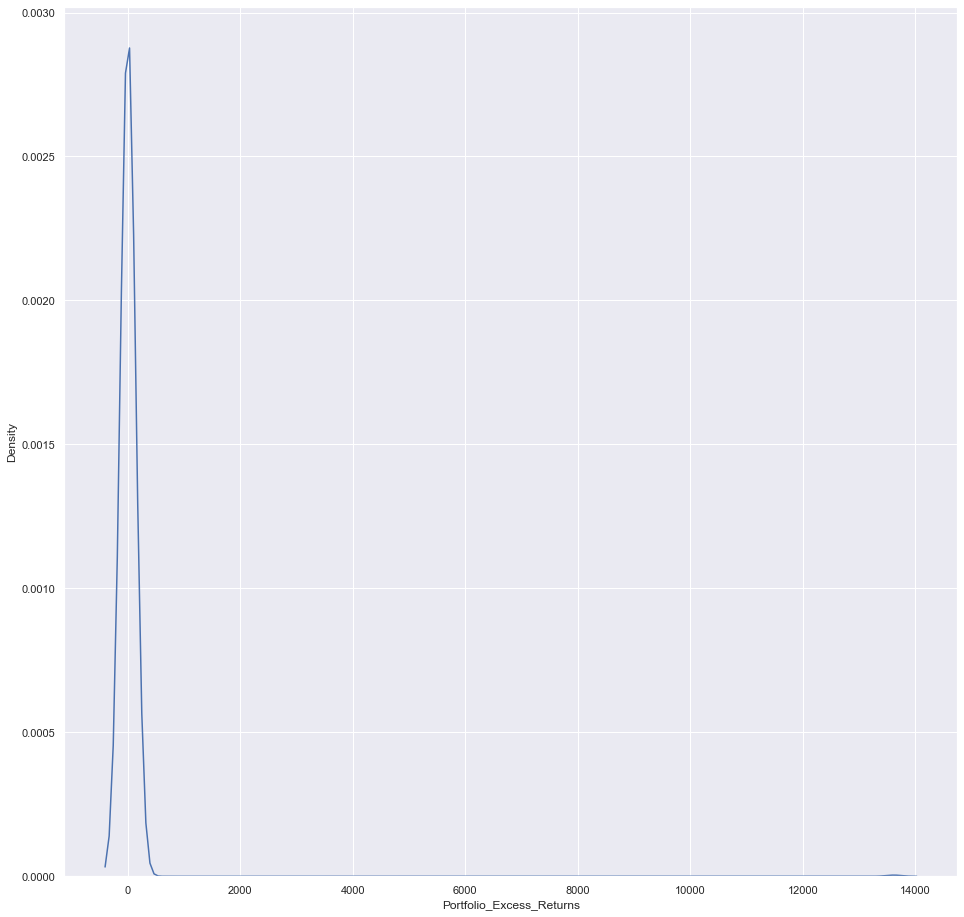

In [42]:
import seaborn as sns
sns.set(rc = {"figure.figsize": (16,16)})
fig1 = sns.kdeplot(sin_model_df2["Portfolio_Excess_Returns"])



# Plots

In [43]:
sin_model_df2.loc[sin_model_df2["Portfolio_Returns"].idxmax()]

Portfolio_Returns           13621.558547
ExRm                           -0.062500
SMB                            -0.059400
HML                             0.127500
rf                              0.000000
MOM                            -0.025900
Portfolio_Excess_Returns    13621.558547
USREC                           0.000000
Name: 2022-01-31 00:00:00, dtype: float64

<AxesSubplot:title={'center':'Portfolio Excess Returns with US Recession Indicator on secondary y axis'}>

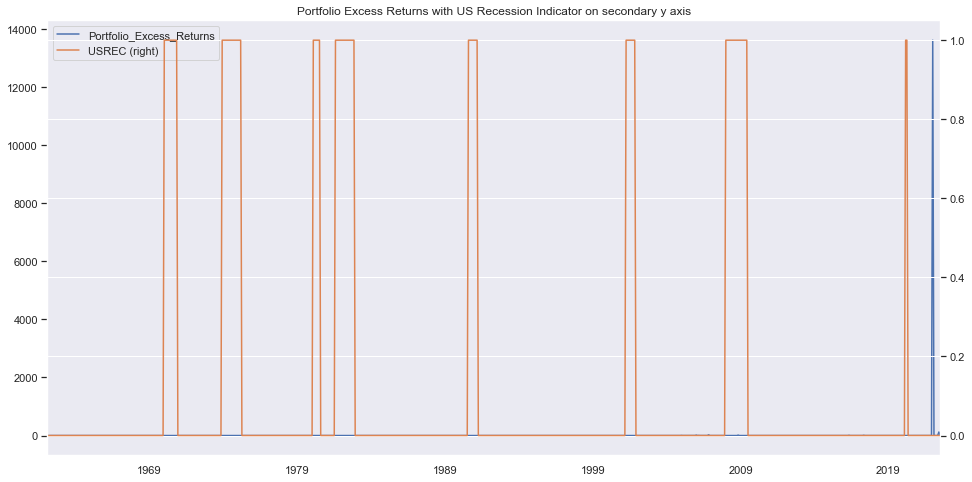

In [44]:
sin_model_df2[["Portfolio_Excess_Returns", "USREC"]].plot(secondary_y = ["USREC"], figsize = (16,8), title = "Portfolio Excess Returns with US Recession Indicator on secondary y axis")

## Comparables

In [45]:
sic_stim = [2095]
naics_stim = [311920]
stim_stocks = universe_df[((universe_df["sic"].isin(sic_stim)) | (universe_df["naics"].isin(naics_stim)))]

In [46]:
stim_stocks

,gvkey,iid,datadate,tic,trt1m,naics,sic
418941,3013,01,31/01/1962,CHF.,NaN,311920.0,2090.0
418942,3013,01,28/02/1962,CHF.,NaN,311920.0,2090.0
418943,3013,01,31/03/1962,CHF.,NaN,311920.0,2090.0
418944,3013,01,30/04/1962,CHF.,NaN,311920.0,2090.0
418945,3013,01,31/05/1962,CHF.,NaN,311920.0,2090.0
...,...,...,...,...,...,...,...
7380788,189655,01,31/12/2019,BKCT,NaN,311920.0,2090.0
7380789,189655,01,29/02/2020,BKCT,900.0,311920.0,2090.0
7380790,189655,01,30/04/2020,BKCT,0.0,311920.0,2090.0
7380791,189655,01,31/05/2020,BKCT,100.0,311920.0,2090.0


In [47]:
len(stim_stocks["tic"].unique())

25

# Checking distribution of both sin and stimulant stocks

In [80]:
sin_stim_stocks = pd.concat([sin_stocks,stim_stocks], axis = 0)
sin_stim_stocks

,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns
65809,1320,01,1972-09-30 00:00:00,ALV.3,NaN,NaN,2080.0,NaN
65810,1320,01,1972-10-31 00:00:00,ALV.3,9.0498,NaN,2080.0,0.090498
65811,1320,01,1972-11-30 00:00:00,ALV.3,-3.7344,NaN,2080.0,-0.037344
65812,1320,01,1972-12-31 00:00:00,ALV.3,7.3276,NaN,2080.0,0.073276
65813,1320,01,1973-01-31 00:00:00,ALV.3,18.0723,NaN,2080.0,0.180723
...,...,...,...,...,...,...,...,...
7380788,189655,01,31/12/2019,BKCT,NaN,311920.0,2090.0,NaN
7380789,189655,01,29/02/2020,BKCT,900.0000,311920.0,2090.0,NaN
7380790,189655,01,30/04/2020,BKCT,0.0000,311920.0,2090.0,NaN
7380791,189655,01,31/05/2020,BKCT,100.0000,311920.0,2090.0,NaN


## Histograms
Bins:
1. Negatives: -100--90, -90-80 increments of 10%
2. Positives: 0-10, 10-20, ..., 90-100, 100-200, 200-300, 300-400, ... 1000, 1000-infty 

In [81]:
sin_stim_stocks["trt1m"].describe()

count    6.160300e+04
mean     2.640941e+03
std      6.366215e+05
min     -9.999560e+01
25%     -5.984200e+00
50%      0.000000e+00
75%      6.301650e+00
max      1.580000e+08
Name: trt1m, dtype: float64

(array([1.1800e+02, 1.2700e+02, 1.7600e+02, 2.2200e+02, 3.3800e+02,
        6.7900e+02, 1.0800e+03, 2.0800e+03, 5.6120e+03, 1.7031e+04,
        2.3352e+04, 5.5470e+03, 2.0410e+03, 8.9700e+02, 4.2800e+02,
        3.5800e+02, 2.4000e+02, 1.3200e+02, 1.3400e+02, 6.8000e+01,
        4.9200e+02, 1.4300e+02, 4.7000e+01, 4.1000e+01, 1.8000e+01,
        1.9000e+01, 9.0000e+00, 6.0000e+00, 4.5000e+01]),
 array([-100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,
          10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  200,
         300,  400,  500,  600,  700,  800,  900, 1000]),
 <BarContainer object of 29 artists>)

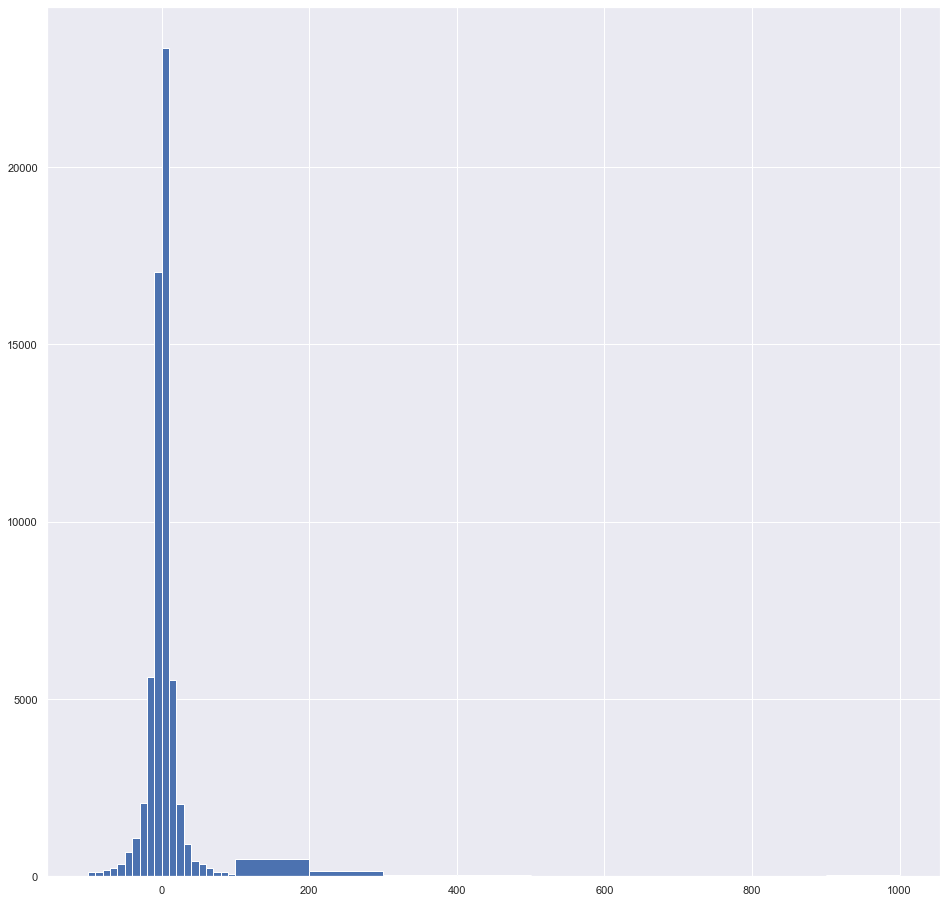

In [82]:
plt.hist(sin_stim_stocks["trt1m"], bins = [x for x in range(-100,100,10)] + [x for x in range(100, 1100, 100)])

In [83]:
sin_stim_stocks.describe()

,gvkey,trt1m,naics,sic,monthly_decimal_returns
count,64222.000000,6.160300e+04,61169.000000,64222.000000,5.812000e+04
mean,56217.281944,2.640941e+03,443231.891154,4386.667341,2.773615e+01
std,70940.339442,6.366215e+05,235073.752417,2877.268578,6.554065e+03
min,1320.000000,-9.999560e+01,312.000000,2080.000000,-9.999560e-01
25%,6124.000000,-5.984200e+00,312120.000000,2082.000000,-5.946275e-02
50%,23019.000000,0.000000e+00,312140.000000,2090.000000,0.000000e+00
75%,100472.000000,6.301650e+00,713210.000000,7990.000000,6.322025e-02
max,350910.000000,1.580000e+08,721120.000000,9995.000000,1.580000e+06


In [84]:
above_1000 = sin_stim_stocks[sin_stim_stocks["trt1m"] >= 1000]
# plt.hist(above_1000["trt1m"], bins = range(int(above_1000["trt1m"].min()), int(above_1000["trt1m"].max()), 1000))
above_1000.describe()["trt1m"].to_csv("above_1k_summary.csv")

([<matplotlib.axis.XTick at 0x2aa57192d48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

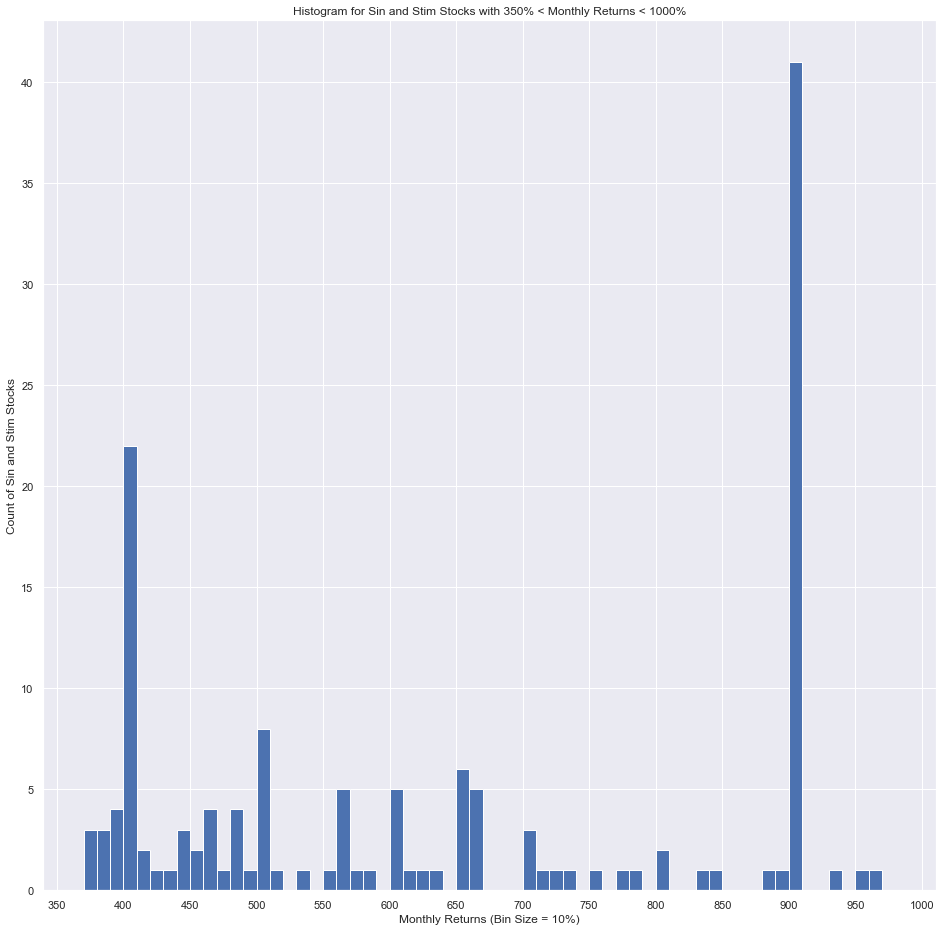

In [129]:
range_350 = sin_stim_stocks[(sin_stim_stocks["trt1m"] > 350) & (sin_stim_stocks["trt1m"] < 1000)]
plt.hist(range_350["trt1m"], bins = range(int(range_350["trt1m"].min()), int(range_350["trt1m"].max()), 10))
plt.title("Histogram for Sin and Stim Stocks with 350% < Monthly Returns < 1000%")
plt.xlabel("Monthly Returns (Bin Size = 10%)")
plt.ylabel("Count of Sin and Stim Stocks")
plt.xticks([x for x in range(350, 1050,50)])

([<matplotlib.axis.XTick at 0x2aa56d61688>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

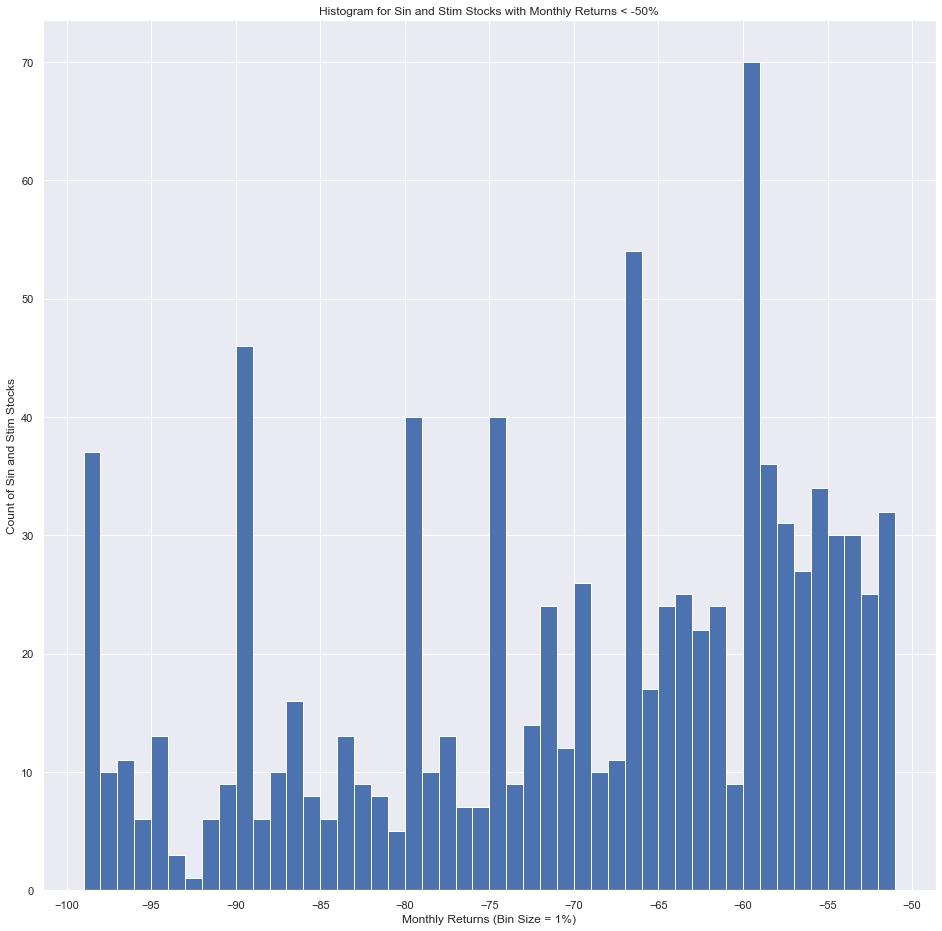

In [130]:
below_neg50 = sin_stim_stocks[sin_stim_stocks["trt1m"] <= -50]
plt.hist(below_neg50["trt1m"], bins = range(int(below_neg50["trt1m"].min()), int(below_neg50["trt1m"].max()), 1))
plt.title("Histogram for Sin and Stim Stocks with Monthly Returns < -50%")
plt.xlabel("Monthly Returns (Bin Size = 1%)")
plt.ylabel("Count of Sin and Stim Stocks")
plt.xticks([x for x in range(-100, -45, 5)])

([<matplotlib.axis.XTick at 0x2aa55195248>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

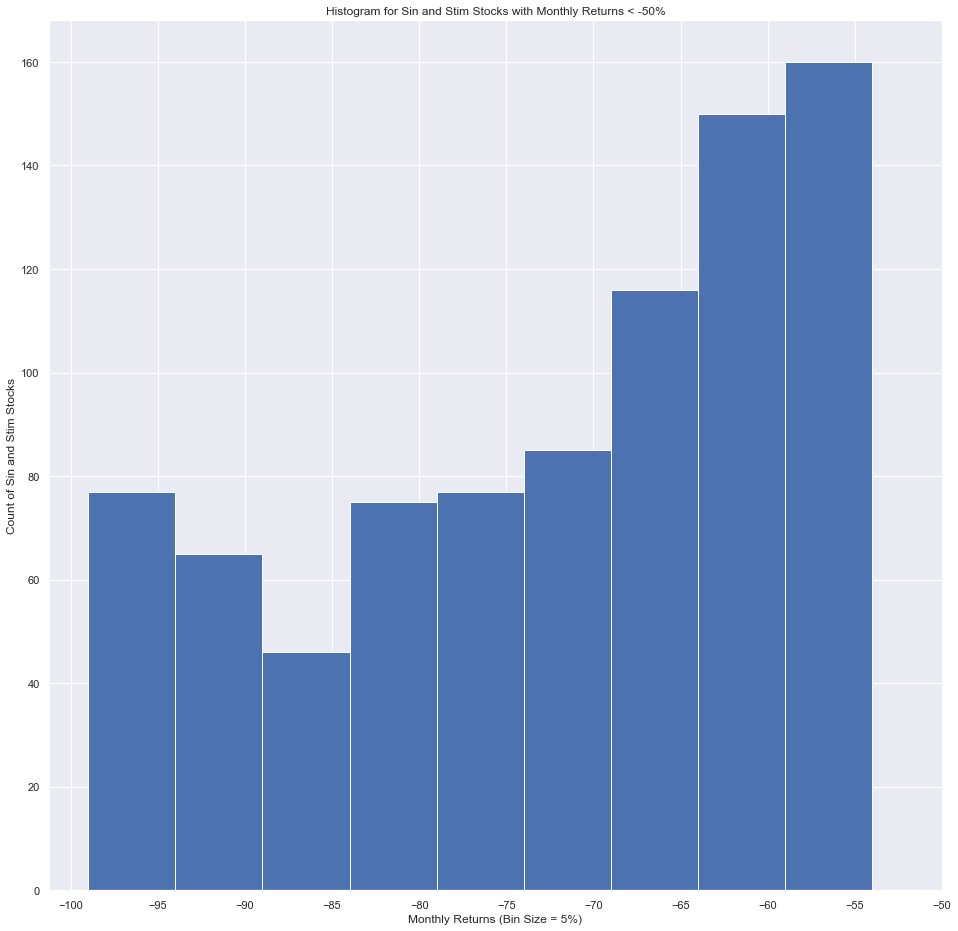

In [105]:
plt.hist(below_neg50["trt1m"], bins = range(int(below_neg50["trt1m"].min()), int(below_neg50["trt1m"].max()), 5))
plt.title("Histogram for Sin and Stim Stocks with Monthly Returns < -50%")
plt.xlabel("Monthly Returns (Bin Size = 5%)")
plt.ylabel("Count of Sin and Stim Stocks")
plt.xticks([x for x in range(-100, -45, 5)])

Text(0, 0.5, 'Count of Sin and Stim Stocks')

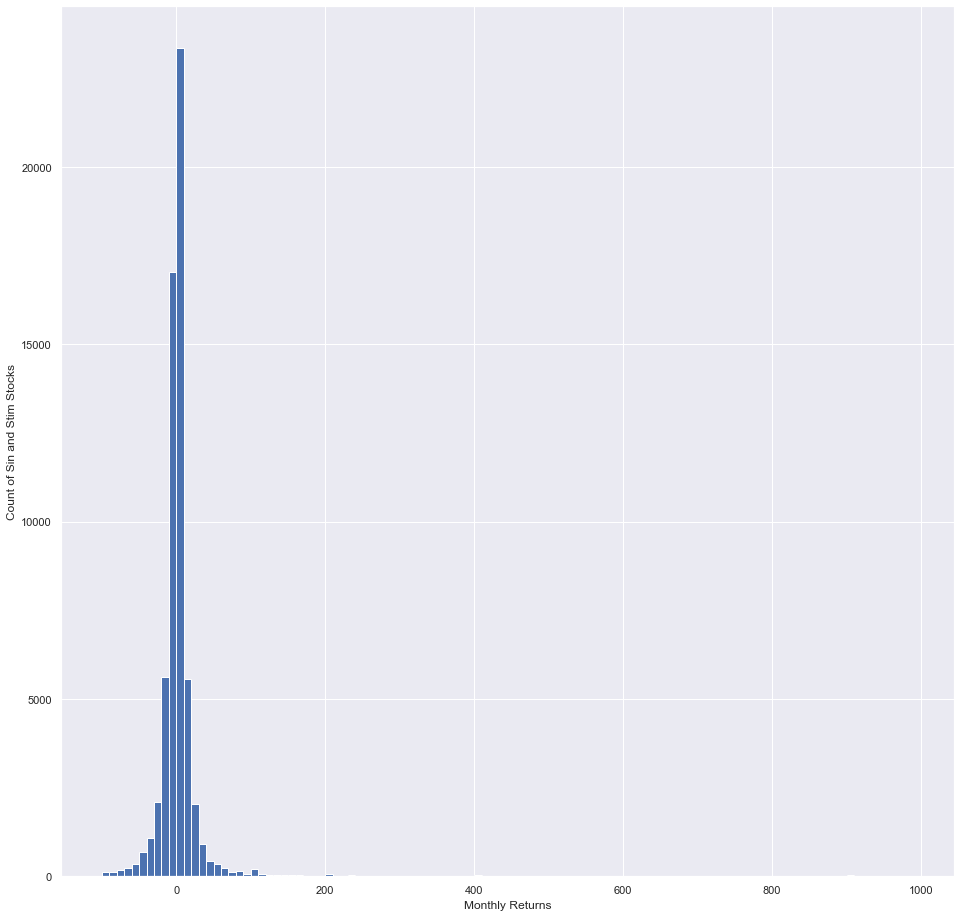

In [131]:
fig = plt.hist(sin_stim_stocks["trt1m"], bins = [x for x in range(-100,1000,10)])
plt.xlabel("Monthly Returns")
plt.ylabel("Count of Sin and Stim Stocks")

Text(0, 0.5, 'Count of Sin and Stim Stocks')

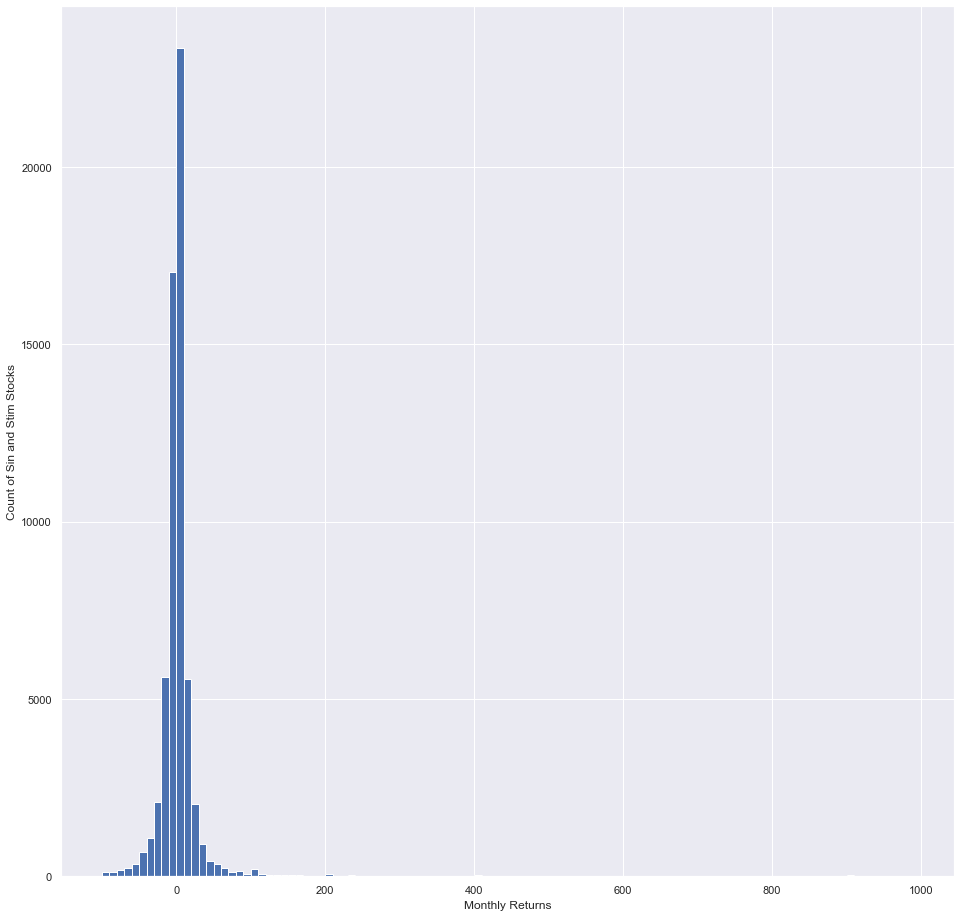

In [92]:
fig0 = plt.hist(sin_stim_stocks["trt1m"], bins = [x for x in range(-100,1000,10)])
plt.xlabel("Monthly Returns")
plt.ylabel("Count of Sin and Stim Stocks")